<a href="https://colab.research.google.com/github/kangkwanghyup/2022test/blob/main/5_9_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import datetime
from __future__ import print_function
import pandas as pd
import numpy as np
import glob
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import keras
import os, sys, math, copy
import scipy.io as sio
import tensorflow as tf
from keras.models import Model, Sequential
from keras.layers import InputSpec
#from keras.engine import Layer, InputSpec
from keras.optimizers import RMSprop, SGD, Adam
from keras import initializers, regularizers, constraints
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, History
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras import backend as k
from keras.utils import np_utils
sys.setrecursionlimit(10000)

import matplotlib.pyplot as plt

In [3]:
train_sample = pd.read_csv("/content/drive/MyDrive/train.csv", header=0 , encoding = 'utf-8')
path = "/content/drive/MyDrive/5.9."
all_files = glob.glob(path+ '/*.csv')
train_sample_np = np.array(train_sample.copy())

In [4]:
li_df=[]
for filename in all_files:
  df = pd.read_csv(filename, index_col=None, header=0)
  li_df.append(df)

In [5]:
train_sample_np

array([[1, 'aluminum', 6, 4.0, 'unworn', 'yes', 'yes'],
       [2, 'aluminum', 20, 4.0, 'unworn', 'yes', 'yes'],
       [3, 'aluminum', 6, 3.0, 'unworn', 'yes', 'yes'],
       [4, 'aluminum', 6, 2.5, 'unworn', 'no', nan],
       [5, 'aluminum', 20, 3.0, 'unworn', 'no', nan],
       [6, 'aluminum', 6, 4.0, 'worn', 'yes', 'no'],
       [7, 'aluminum', 20, 4.0, 'worn', 'no', nan],
       [8, 'aluminum', 20, 4.0, 'worn', 'yes', 'no'],
       [9, 'aluminum', 15, 4.0, 'worn', 'yes', 'no'],
       [10, 'aluminum', 12, 4.0, 'worn', 'yes', 'no'],
       [11, 'aluminum', 3, 4.0, 'unworn', 'yes', 'yes'],
       [12, 'aluminum', 3, 3.0, 'unworn', 'yes', 'yes'],
       [13, 'aluminum', 3, 4.0, 'worn', 'yes', 'yes'],
       [14, 'aluminum', 3, 3.0, 'worn', 'yes', 'yes'],
       [15, 'aluminum', 6, 3.0, 'worn', 'yes', 'yes'],
       [16, 'aluminum', 20, 3.0, 'worn', 'no', nan],
       [17, 'aluminum', 3, 2.5, 'unworn', 'yes', 'yes'],
       [18, 'aluminum', 3, 2.5, 'worn', 'yes', 'yes'],
       [19, 

In [ ]:
li_df

[     X_ActualPosition  X_ActualVelocity  X_ActualAcceleration  X_SetPosition  \
 0                 202             4.025                 10.25            202   
 1                 202             4.000                  4.00            202   
 2                 202             4.000                  4.00            202   
 3                 202             4.025                 10.25            202   
 4                 202             3.975                 -2.25            202   
 ..                ...               ...                   ...            ...   
 527               202             4.025                 16.50            202   
 528               202             4.000                  4.00            202   
 529               202             4.025                 16.50            202   
 530               202             4.025                 16.50            202   
 531               202             4.000                 -2.25            202   
 
      X_SetVelocity  X_Set

In [6]:
df

,X_ActualPosition,X_ActualVelocity,X_ActualAcceleration,X_SetPosition,X_SetVelocity,X_SetAcceleration,X_CurrentFeedback,X_DCBusVoltage,X_OutputCurrent,X_OutputVoltage,...,S_CurrentFeedback,S_DCBusVoltage,S_OutputCurrent,S_OutputVoltage,S_OutputPower,S_SystemInertia,M_CURRENT_PROGRAM_NUMBER,M_sequence_number,M_CURRENT_FEEDRATE,Machining_Process
0,202,4.000,4.00,202,4.0,4.000000,0.18,0.0207,329,2.77,...,0.5240,2.740000e-19,329,0.0,6.960000e-07,16,1,0,50,Starting
1,202,-6.800,-346.00,202,-9.6,-354.000000,-10.90,0.1860,328,23.30,...,-0.2880,2.740000e-19,328,0.0,-5.270000e-07,16,1,4,50,Prep
2,200,-13.800,-2.25,200,-13.9,3.999905,-8.59,0.1400,328,30.60,...,0.5240,2.740000e-19,328,0.0,9.100000e-07,16,1,7,50,Prep
3,198,-14.000,4.00,198,-13.9,3.999905,-6.11,0.1300,327,30.30,...,-0.1800,2.740000e-19,328,0.0,1.070000e-06,16,1,7,50,Prep
4,197,-13.900,-14.80,196,-13.9,4.000095,-5.70,0.1140,328,30.50,...,0.2260,2.740000e-19,328,0.0,1.960000e-06,16,1,7,50,Prep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,145,4.175,91.50,145,4.0,4.000000,-2.84,0.0522,325,7.39,...,20.5000,9.310000e-01,319,118.0,1.790000e-01,16,1,132,50,end
1051,145,3.850,-83.50,145,4.0,4.000000,-1.85,0.0522,325,2.69,...,15.8000,7.200000e-01,319,117.0,1.380000e-01,16,1,132,50,end
1052,145,3.825,-83.50,145,4.0,4.000000,-2.20,0.0527,325,2.22,...,24.3000,1.000000e+00,318,120.0,1.920000e-01,16,1,132,50,end
1053,145,4.150,91.50,145,4.0,4.000000,-4.02,0.0502,326,5.80,...,22.4000,9.290000e-01,321,120.0,1.780000e-01,16,1,132,50,end


AttributeError: ignored

In [7]:
nb_pass=0
nb_pass_half=0
nb_defective=0

for i in range(len(train_sample_np)):
  if train_sample_np[i,5]=='no':
    nb_defective +=1
  if train_sample_np[i,5]=='yes' and train_sample_np[i,6]=='yes':
    nb_pass +=1
  if train_sample_np[i,5]=='yes' and train_sample_np[i,6]=='no':
    nb_pass_half +=1
    
print('양품 샘플 개수: ', nb_pass)
print('공정 마쳤으나 육안검사 통과 못한 샘플개수: ', nb_pass_half)
print('공정 중지된샘플 개수: ', nb_defective)
print('전체 샘플 개수: ', nb_pass + nb_pass_half + nb_defective)

양품 샘플 개수:  13
공정 마쳤으나 육안검사 통과 못한 샘플개수:  6
공정 중지된샘플 개수:  6
전체 샘플 개수:  25


In [8]:
def tool_condition(input):
  for i in range(len(input)):
    if input[i,4]=='unworn':
      input[i,4]=0
    else:
      input[i,4]=1
  return input

def item_inspection(input):
  for i in range(len(input)):
    if input[i,5]=='no':
      input[i,6]=2
    elif input[i,5]=='yes' and  input[i,6]=='no' :
      input[i,6]=1
    elif input[i,5]=='yes' and  input[i,6]=='yes' :
      input[i,6]=0
  return input

def machininig_process(input):
  for i in range(len(input)):
    if input[i,47]=='Prep':
      input[i,47]=0
    elif input[i,47]=='Layer 1 Up':
      input[i,47]=1
    elif input[i,47]=='Layer 1 Down':
      input[i,47]=2
    elif input[i,47]=='Layer 2 Up':
      input[i,47]=3
    elif input[i,47]=='Layer 2 Down':
      input[i,47]=4
    elif input[i,47]=='Layer 3 Up':
      input[i,47]=5
    elif input[i,47]=='Layer 3 Down':
      input[i,47]=6
    elif input[i,47]=='Repositioning':
      input[i,47]=7
    elif input[i,47]=='End'or'end':
      input[i,47]=8
    elif input[i,47]=='Starting':
      input[i,47]=9
  return input

In [9]:
train_sample_info = np.array(train_sample_np.copy())
train_sample_info = tool_condition(train_sample_info)
train_sample_info = item_inspection(train_sample_info)
print(train_sample_info)

[[1 'aluminum' 6 4.0 0 'yes' 0]
 [2 'aluminum' 20 4.0 0 'yes' 0]
 [3 'aluminum' 6 3.0 0 'yes' 0]
 [4 'aluminum' 6 2.5 0 'no' 2]
 [5 'aluminum' 20 3.0 0 'no' 2]
 [6 'aluminum' 6 4.0 1 'yes' 1]
 [7 'aluminum' 20 4.0 1 'no' 2]
 [8 'aluminum' 20 4.0 1 'yes' 1]
 [9 'aluminum' 15 4.0 1 'yes' 1]
 [10 'aluminum' 12 4.0 1 'yes' 1]
 [11 'aluminum' 3 4.0 0 'yes' 0]
 [12 'aluminum' 3 3.0 0 'yes' 0]
 [13 'aluminum' 3 4.0 1 'yes' 0]
 [14 'aluminum' 3 3.0 1 'yes' 0]
 [15 'aluminum' 6 3.0 1 'yes' 0]
 [16 'aluminum' 20 3.0 1 'no' 2]
 [17 'aluminum' 3 2.5 0 'yes' 0]
 [18 'aluminum' 3 2.5 1 'yes' 0]
 [19 'aluminum' 15 4.0 1 'yes' 1]
 [20 'aluminum' 12 4.0 0 'no' 2]
 [21 'aluminum' 3 4.0 0 'yes' 1]
 [22 'aluminum' 20 3.0 1 'yes' 0]
 [23 'aluminum' 3 4.0 1 'no' 2]
 [24 'aluminum' 3 3.0 0 'yes' 0]
 [25 'aluminum' 6 2.5 1 'yes' 0]]


In [10]:
train_sample_info=np.delete(train_sample_info,5,axis=1)
train_sample_info=np.delete(train_sample_info,0,axis=1)
train_sample_info=np.delete(train_sample_info,0,axis=1)
print(train_sample_info)

[[6 4.0 0 0]
 [20 4.0 0 0]
 [6 3.0 0 0]
 [6 2.5 0 2]
 [20 3.0 0 2]
 [6 4.0 1 1]
 [20 4.0 1 2]
 [20 4.0 1 1]
 [15 4.0 1 1]
 [12 4.0 1 1]
 [3 4.0 0 0]
 [3 3.0 0 0]
 [3 4.0 1 0]
 [3 3.0 1 0]
 [6 3.0 1 0]
 [20 3.0 1 2]
 [3 2.5 0 0]
 [3 2.5 1 0]
 [15 4.0 1 1]
 [12 4.0 0 2]
 [3 4.0 0 1]
 [20 3.0 1 0]
 [3 4.0 1 2]
 [3 3.0 0 0]
 [6 2.5 1 0]]


In [11]:
k = 0
li_pass=[]
li_pass_half=[]
li_fail=[]

for filename in all_files:
  df = pd.read_csv(filename, index_col=None, header=0)

  if train_sample_info[k,3]==0:
    li_pass.append(df)
  elif train_sample_info[k,3]==1:
    li_pass_half.append(df)
  else:
    li_fail.append(df)

  k+=1

frame01=pd.concat(li_pass, axis=0, ignore_index=True)
frame02=pd.concat(li_pass_half, axis=0, ignore_index=True)
frame03=pd.concat(li_fail, axis=0, ignore_index=True)

data_pass=np.array(frame01.copy())
data_pass_half=np.array(frame02.copy())
data_fail=np.array(frame03.copy())

print('공정 완료 및 육안검사 합격한 전체 데이터 수 :', len(data_pass))
print('공정 완료 및 육안검사 불합격한 전체 데이터 수 :', len(data_pass_half))
print('공정 미완료한 전체 데이터 수 :', len(data_fail))

공정 완료 및 육안검사 합격한 전체 데이터 수 : 13897
공정 완료 및 육안검사 불합격한 전체 데이터 수 : 8632
공정 미완료한 전체 데이터 수 : 9519


In [12]:
data_pass= machininig_process(data_pass)
data_pass_half= machininig_process(data_pass_half)
data_fail= machininig_process(data_fail)

In [13]:
print(data_pass.shape) #양품 합격품
print(data_pass_half.shape) #불합격
print(data_fail.shape) #공정미완료료


(13897, 48)
(8632, 48)
(9519, 48)


In [42]:
data01= data_pass[0:10000,:] #양품 중에서 불량품 뽑는다
data02= data_pass_half[0:5000,:]  #육안 불량
data03= data_fail[0:5000,:]    #공정불량량

data=np.concatenate((data01,data02),axis=0);
data=np.concatenate((data,data03),axis=0);  #전체 데이터 합친거
data_all=data_pass[10000:,:]    #학습 완료후 평가에 사용할 남은 데이터셋 pass 에 샘플 데이터 

data04=data_fail[5000:,:]

data_all=np.concatenate((data_all,data04),axis=0);

print(data)
print(data.shape)
print(data_all.shape)

[[202.0 4.025 10.25 ... 2 50 0]
 [202.0 4.0 4.0 ... 0 50 0]
 [202.0 4.0 4.0 ... 0 50 0]
 ...
 [174.5 4.915 -18.4 ... 0 50 5]
 [174.5 4.875 -18.4 ... 0 50 5]
 [174.5 4.915 -27.75 ... 0 50 5]]
(20000, 48)
(8416, 48)


In [43]:
sc=MinMaxScaler()
X_train = sc.fit_transform(data)
X_train = np.array(X_train)
X_test = sc.fit_transform(data_all)
X_test  = np.array(X_test)

Y_train = np.zeros((len(X_train),1), dtype='int')
Y_test = np.zeros((len(X_test),1), dtype='int')

Y_train[0:10000,:]=1
Y_train[10000:,:]=0
print(Y_train)
print(Y_train.shape)

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]
(20000, 1)


In [44]:
#nb_classes =2
#batch_size=1024
#epochs =300
#lr =1e-4

X_train =X_train.astype('float32')
X_test =X_test.astype('float32')

Y_train = np_utils.to_categorical(Y_train, 2)
Y_test =  np_utils.to_categorical(Y_test, 2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(20000, 48)
(8416, 48)
(20000, 2)
(8416, 2)


In [45]:

model = Sequential()
model.add(Dense(128, activation = 'relu', input_dim =48))
model.add(Dropout(0.3))

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(265, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(2, activation='sigmoid'))
model_checkpoint= ModelCheckpoint('weight_cnc_binary.mat', monitor = 'val_acc',save_best_only=True)




Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 128)               6272      
                                                                 
 dropout_30 (Dropout)        (None, 128)               0         
                                                                 
 dense_36 (Dense)            (None, 256)               33024     
                                                                 
 dropout_31 (Dropout)        (None, 256)               0         
                                                                 
 dense_37 (Dense)            (None, 512)               131584    
                                                                 
 dropout_32 (Dropout)        (None, 512)               0         
                                                                 
 dense_38 (Dense)            (None, 512)              

<ipython-input-47-97a339789400>:21: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('Validation Accuracy', 'Training Accuracy')


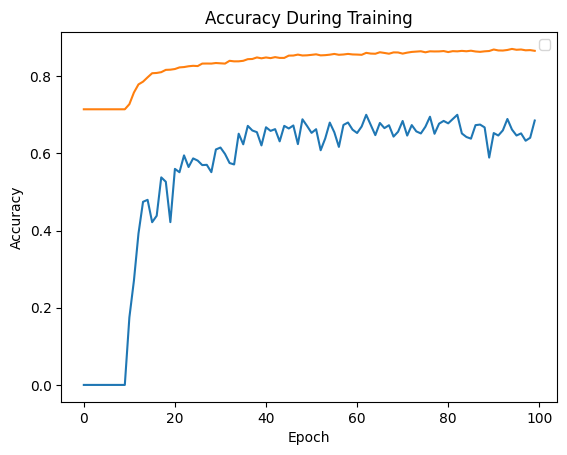

<ipython-input-47-97a339789400>:30: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('Validation Loss', 'Training Loss')


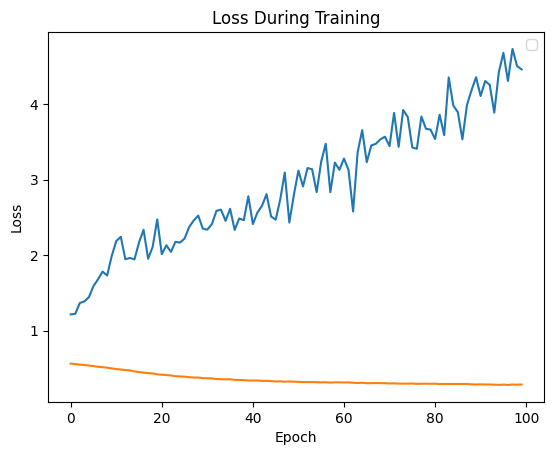

In [47]:

model.summary()
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
history=History()
print('............modl is defined............')

model.fit(X_train, Y_train, verbose=1 , epochs = 100, validation_split =0.3 , shuffle=True , callbacks=[history])
model.save_weights('weight_cnc_binary.mat')

loss_and_metrics= model.evaluate(X_train, Y_train)
print(loss_and_metrics)

loss_and_metrics2= model.evaluate(X_test, Y_test)
print(loss_and_metrics2)

plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])

plt.title('Accuracy During Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend('Validation Accuracy', 'Training Accuracy')
plt.show()

plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

plt.title('Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend('Validation Loss', 'Training Loss')
plt.show()
